![store](https://i.ytimg.com/vi/hT1wgTRVRxg/maxresdefault.jpg?sqp=-oaymwEmCIAKENAF8quKqQMa8AEB-AHUBoAC4AOKAgwIABABGGUgWyhIMA8=&rs=AOn4CLCApbjU7JYbQi-TffAp8esnBH9bZg)

source data= [kaggle](https://www.kaggle.com/datasets/jr2ngb/superstore-data)

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import plotly.express as px
import folium

# DATA CLEANING

In [8]:
df = pd.read_excel('superstore_dataset.xlsx')
df.head()

,Order ID,Order Date,Customer Name,Country,State,City,Region,Segment,Ship Mode,Category,Sub-Category,Product Name,Discount,Sales,Profit,Quantity,Feedback?
0,BN-2011-7407039,2011-01-01,Ruby Patel,Sweden,Stockholm,Stockholm,North,Home Office,Economy Plus,Office Supplies,Paper,"Enermax Note Cards, Premium",0.5,45,-26,3,False
1,AZ-2011-9050313,2011-01-03,Summer Hayward,United Kingdom,England,Southport,North,Consumer,Economy,Furniture,Bookcases,"Dania Corner Shelving, Traditional",0.0,854,290,7,True
2,AZ-2011-6674300,2011-01-04,Devin Huddleston,France,Auvergne-Rhône-Alpes,Valence,Central,Consumer,Economy,Office Supplies,Art,"Binney & Smith Sketch Pad, Easy-Erase",0.0,140,21,3,True
3,BN-2011-2819714,2011-01-04,Mary Parker,United Kingdom,England,Birmingham,North,Corporate,Economy,Office Supplies,Art,"Boston Markers, Easy-Erase",0.5,27,-22,2,True
4,BN-2011-2819714,2011-01-04,Mary Parker,United Kingdom,England,Birmingham,North,Corporate,Economy,Office Supplies,Storage,"Eldon Folders, Single Width",0.5,17,-1,2,True


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8047 entries, 0 to 8046
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Order ID       8047 non-null   object        
 1   Order Date     8047 non-null   datetime64[ns]
 2   Customer Name  8047 non-null   object        
 3   Country        8047 non-null   object        
 4   State          8047 non-null   object        
 5   City           8047 non-null   object        
 6   Region         8047 non-null   object        
 7   Segment        8047 non-null   object        
 8   Ship Mode      8047 non-null   object        
 9   Category       8047 non-null   object        
 10  Sub-Category   8047 non-null   object        
 11  Product Name   8047 non-null   object        
 12  Discount       8047 non-null   float64       
 13  Sales          8047 non-null   int64         
 14  Profit         8047 non-null   int64         
 15  Quantity       8047 n

In [10]:
print(df["State"].unique())

['Stockholm' 'England' 'Auvergne-Rhône-Alpes' "Provence-Alpes-Côte d'Azur"
 'Languedoc-Roussillon-Midi-Pyrénées' 'Liguria' 'Vienna' 'Murcia'
 'Lower Saxony' 'South Holland' 'Västra Götaland' 'Hovedstaden'
 'Valenciana' 'South Denmark' 'Lombardy' 'Sicily' 'Ile-de-France'
 'North Rhine-Westphalia' 'Flemish Brabant' 'Tuscany' 'Emilia-Romagna'
 'Madrid' 'Oslo' 'Lisboa' 'Saxony' 'Andalusía' 'Catalonia'
 'Alsace-Champagne-Ardenne-Lorraine' 'Bavaria' 'Uppsala'
 'Nord-Pas-de-Calais-Picardie' 'Hesse' 'Overijssel' 'Basel-Stadt'
 'Bourgogne-Franche-Comté' 'Zürich' 'Dublin' 'Lazio' 'Namur'
 'North Holland' 'Berlin' 'Baden-Württemberg'
 'Aquitaine-Limousin-Poitou-Charentes' 'Uusimaa' 'Apulia' 'Saxony-Anhalt'
 'Rogaland' 'Sardinia' 'Drenthe' 'Mecklenburg-Vorpommern' 'North Brabant'
 'Umbria' 'Geneva' 'Veneto' 'Normandy' 'Scotland' 'Coimbra'
 'Castile and León' 'Gelderland' 'Hamburg' 'Brandenburg'
 'Pays de la Loire' 'Antwerp' 'Bremen' 'Thuringia' 'Porto' 'Utrecht'
 'Castile-La Mancha' 'Brittany' 'Ca

In [11]:
print(df["Country"].unique())

['Sweden' 'United Kingdom' 'France' 'Italy' 'Austria' 'Spain' 'Germany'
 'Netherlands' 'Denmark' 'Belgium' 'Norway' 'Portugal' 'Switzerland'
 'Ireland' 'Finland']


# DATA INSIGHT

#### SALES BASED ON DATES

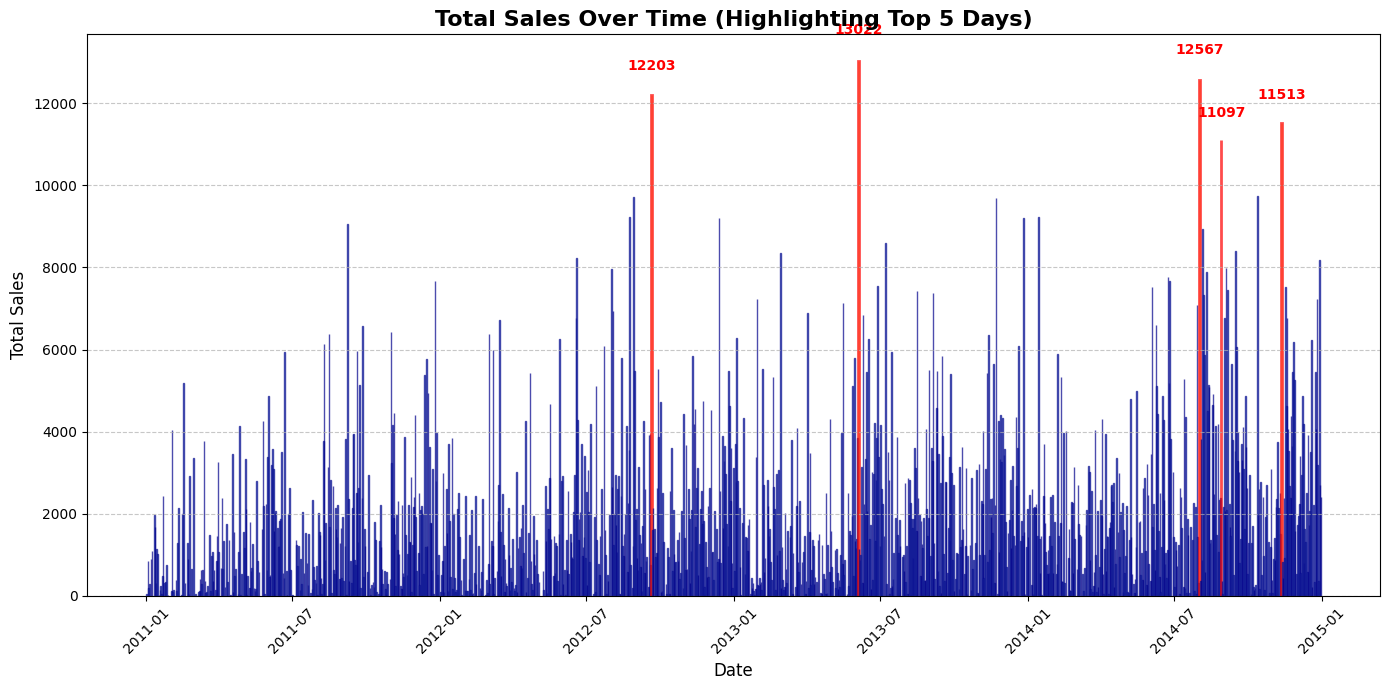

In [12]:
# Convert 'Order Date' to datetime format
df['Order Date'] = pd.to_datetime(df['Order Date'])

# Group data by 'Order Date' and calculate total sales for each date
sales_by_date = df.groupby('Order Date')['Sales'].sum().reset_index()

# Sort by 'Order Date' to maintain chronological order
sales_by_date = sales_by_date.sort_values(by='Order Date')

# Identify top 5 dates with the highest sales
top_5 = sales_by_date.nlargest(5, 'Sales')

# Plot bar chart
plt.figure(figsize=(14, 7))
bars = plt.bar(sales_by_date['Order Date'], sales_by_date['Sales'], color='skyblue', edgecolor='darkblue', alpha=0.7)

# Highlight the top 5 dates with a different color
for bar, date, sales in zip(bars, sales_by_date['Order Date'], sales_by_date['Sales']):
    if date in top_5['Order Date'].values:
        bar.set_color('orange')
        bar.set_edgecolor('red')
        bar.set_linewidth(2)

# Add annotations for the top 5 sales dates
for i, row in top_5.iterrows():
    plt.text(row['Order Date'], row['Sales'] + 0.05 * row['Sales'], f"{row['Sales']:.0f}", 
             ha='center', fontsize=10, fontweight='bold', color='red')

# Adding titles and labels
plt.title('Total Sales Over Time (Highlighting Top 5 Days)', fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

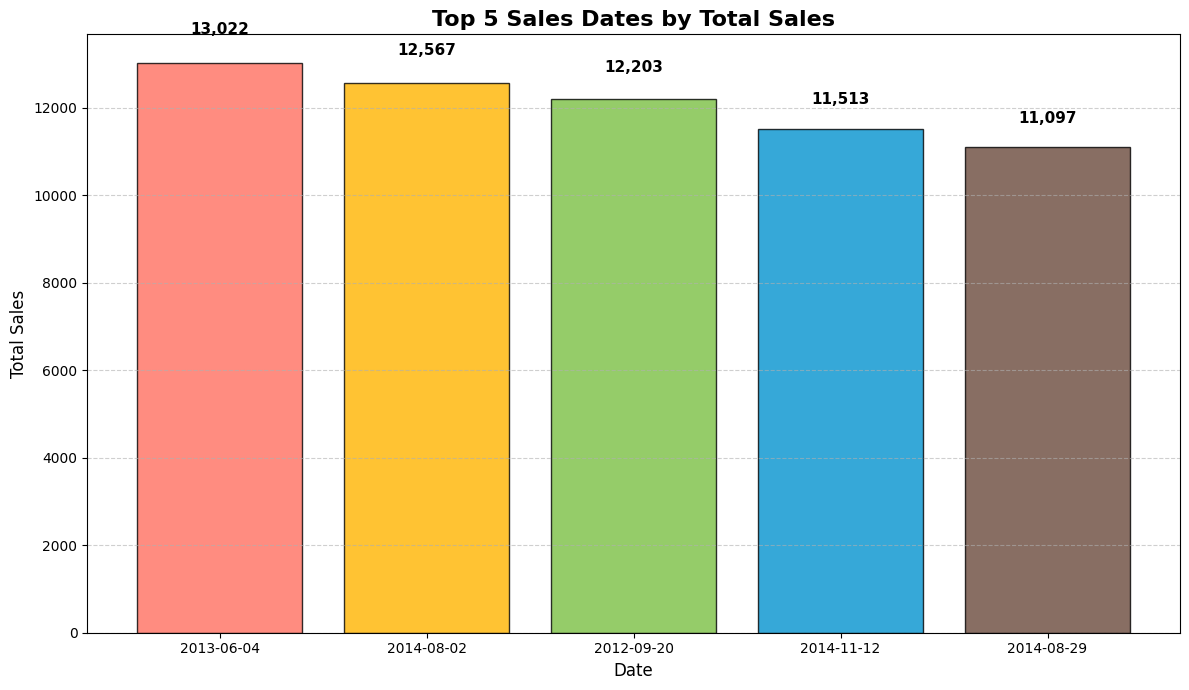

In [14]:

# Convert 'Order Date' to datetime format
df['Order Date'] = pd.to_datetime(df['Order Date'])

# Group data by 'Order Date' and calculate total sales for each date
sales_by_date = df.groupby('Order Date')['Sales'].sum().reset_index()

# Filter top 5 dates with the highest sales
top_5_sales = sales_by_date.nlargest(5, 'Sales').sort_values(by='Sales', ascending=False)

# Plot bar chart for the top 5 sales dates
plt.figure(figsize=(12, 7))
bars = plt.bar(top_5_sales['Order Date'].dt.strftime('%Y-%m-%d'), top_5_sales['Sales'], 
               color=['#FF6F61', '#FFB400', '#7BC043', '#0392CF', '#6A4A3C'], edgecolor='black', alpha=0.8)

# Add annotations on top of each bar
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.05 * bar.get_height(),
             f"{int(bar.get_height()):,}", ha='center', fontsize=11, fontweight='bold', color='black')

# Add titles and labels for bar chart
plt.title('Top 5 Sales Dates by Total Sales', fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()

# Show the bar chart
plt.show()


#### CUSTOMER SEGMENTATION

# testing  dongskadf oauifbp9aeubfaeionfoaeinfoeinafpiuhseiurgfhsu